<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Кирилл! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Привет! Рад знакомству) Давай на ты.

Внес изменения. Работы еще много, надо разбираться с GPU (ниже описал). Но все критичные ошибки поправил.

</div>

# Toxic comments with BERT 🤬

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

**Цель проекта:** Обучить модель классифицировать комментарии на позитивные и негативные.

Целевая метрика: `F1 >= 0.75`

**Содержание**<a id='toc0_'></a>    
1. [ Подготовка       ](#toc1_)    
1.1. [Библиотеки       ](#toc1_1_)    
1.2. [Конфигурация       ](#toc1_2_)    
1.3. [Сервисные функции       ](#toc1_3_)    
2. [Данные       ](#toc2_)    
2.1. [Загрузка       ](#toc2_1_)    
2.2. [Проверка типов данных       ](#toc2_2_)    
2.3. [Проверка пропусков       ](#toc2_3_)    
2.4. [Проверка полных дубликатов       ](#toc2_4_)    
2.5. [Изучение таргета       ](#toc2_5_)    
2.6. [Выводы по датасету       ](#toc2_6_)    
3. [Обработка текста       ](#toc3_)    
4. [Модели       ](#toc4_)    
4.1. [Разделение данных       ](#toc4_1_)    
4.2. [Подготовка      ](#toc4_2_)    
4.3. [Модель `LogisticRegression`      ](#toc4_3_)    
4.4. [Модель `RandomForestClassifier`     ](#toc4_4_)    
4.5. [Модель `LGBMClassifier`     ](#toc4_5_)    
4.6. [Модель `CatBoostClassifier`     ](#toc4_6_)    
4.7. [Модель `BERT`  ](#toc4_7_)    
4.8. [Модель `toxic-BERT` ](#toc4_8_)    
5. [Результаты     ](#toc5_)    
5.1. [Результаты на тренировочной выборке     ](#toc5_1_)    
5.2. [Результаты на тестовой выборке     ](#toc5_2_)    
6. [Общий вывод     ](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a> Подготовка        [&#8593;](#toc0_)

### 1.1. <a id='toc1_1_'></a>Библиотеки        [&#8593;](#toc0_)

In [1]:
from IPython.display import clear_output

In [2]:
%pip install -q accelerate==0.26.0
%pip install -q catboost==1.2.7
%pip install -q dill==0.3.8
%pip install -q hyperopt==0.2.7
%pip install -q lightgbm==4.5.0
%pip install -q matplotlib==3.8.4
%pip install -q nltk==3.9.1
%pip install -q numpy==1.26.4
%pip install -q optree==0.14.0
%pip install -q pandas==2.2.3
%pip install -q prettytable==3.12.0
%pip install -q scikit-learn==1.5.2
%pip install -q spacy==3.8.4
%pip install -q termcolor==2.5.0
%pip install -q torch==2.6.0
%pip install -q torchvision==0.21.0
%pip install -q tqdm==4.66.5
%pip install -q transformers==4.49.0

clear_output()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [3]:
import re
from os.path import exists
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import dill
import torch
import spacy

from tqdm.notebook import tqdm
from nltk.corpus import stopwords
from torch.utils.data import (Dataset,
                              DataLoader)
from catboost.utils import get_gpu_device_count
from prettytable import PrettyTable
from termcolor import colored
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold,
                                     cross_val_score)
from sklearn.metrics import (f1_score,
                             classification_report,
                             ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from transformers import (BertTokenizer,
                          BertModel,
                          BertForSequenceClassification,
                          AdamW)
from hyperopt import (hp,
                      fmin,
                      tpe,
                      Trials,
                      STATUS_OK,
                      STATUS_FAIL)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [4]:
tqdm.pandas()

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Добавил tqdm

</div>

In [5]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

clear_output()

### 1.2. <a id='toc1_2_'></a>Конфигурация        [&#8593;](#toc0_)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
RANDOM_STATE = 27
TEST_SIZE = 0.1

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

На тест теперь 10%

</div>

### 1.3. <a id='toc1_3_'></a>Сервисные функции        [&#8593;](#toc0_)

In [8]:
def get_dataframe(paths: list[str], **kwargs) -> pd.DataFrame:
    for _path in paths:
        if not exists(_path) and not _path.startswith('http'):
            continue

        try:
            df = pd.read_csv(_path, **kwargs)
        except:
            continue

        if df is None:
            continue

        return df

    raise FileNotFoundError('No paths are valid for correct csv file.')

In [9]:
def check_duplicates(df: pd.DataFrame) -> None:
    duplicates_count = df.duplicated().sum()

    if duplicates_count == 0:
        print(colored('Полных дубликатов не обнаружено.', 'green'))
        return

    duplicates_part = duplicates_count / len(df)
    print(colored(f'Обнаружено {duplicates_count} дубликатов ({duplicates_part:.2%})', 'red'))

In [10]:
def check_nans(df: pd.DataFrame) -> None:
    if df.isna().sum().sum() == 0:
        print(colored('Полных дубликатов не обнаружено.', 'green'))
        return

    table = PrettyTable()
    table.field_names = ['Feature', 'Missing values count']

    missing_info = df.isna().sum().sort_values()
    cols = missing_info.index.to_list()
    for col in cols:
        count = missing_info[col]
        color = 'green' if count == 0 else 'red'
        s = f'{count} ({count / len(df):.2%})'
        table.add_row([col, colored(s, color)])

    print(table)

In [11]:
def get_value_counts(series: pd.Series) -> None:
    data = pd.DataFrame()
    data['count'] = series.value_counts()
    data['part'] = round(data['count'] / len(series), 4)
    display(data)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## 2. <a id='toc2_'></a>Данные        [&#8593;](#toc0_)

### 2.1. <a id='toc2_1_'></a>Загрузка        [&#8593;](#toc0_)

In [12]:
df = get_dataframe([
    './data/toxic_comments.csv',
    'datasets/toxic_comments.csv',
    'https://code.s3.yandex.net/datasets/toxic_comments.csv'
], index_col=0)

In [13]:
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


### 2.2. <a id='toc2_2_'></a>Проверка типов данных        [&#8593;](#toc0_)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


Все типы данных корректны.

### 2.3. <a id='toc2_3_'></a>Проверка пропусков        [&#8593;](#toc0_)

In [15]:
check_nans(df)

Полных дубликатов не обнаружено.


### 2.4. <a id='toc2_4_'></a>Проверка полных дубликатов        [&#8593;](#toc0_)

In [16]:
check_duplicates(df)

Полных дубликатов не обнаружено.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Данные загружены, есть первичное знакомство с датафреймом </div>

### 2.5. <a id='toc2_5_'></a>Изучение таргета        [&#8593;](#toc0_)

In [17]:
get_value_counts(df['toxic'])

,count,part
toxic,,
0,143106,0.8984
1,16186,0.1016


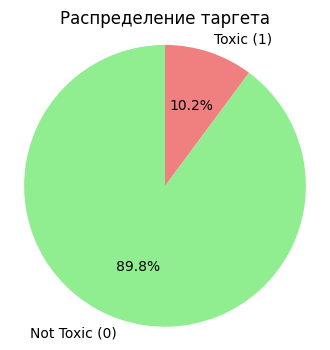

In [18]:
toxic_counts = df['toxic'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(toxic_counts,
        labels=['Not Toxic (0)', 'Toxic (1)'],
        colors=['lightgreen', 'lightcoral'],
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('Распределение таргета')
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, исследован баланс классов. Это важная информация для задачи классификации.</div>

Видим довольно большой дизбаланс.

### 2.6. <a id='toc2_6_'></a>Выводы по датасету        [&#8593;](#toc0_)

Перед нами датасет о комментариях с оценкой их токсичности. Пропуски не обнаружены. Полные дубликаты также не обнаружены. Распределение целевого признака крайне несбалансированное. Записей с таргетом `0` (not toxic) почти в 9 раз больше.

## 3. <a id='toc3_'></a>Обработка текста        [&#8593;](#toc0_)

In [19]:
stop_words = stopwords.words('english')

In [20]:
nlp = spacy.load('en_core_web_md')

In [21]:
def clean_text(text: str) -> str:
    text = re.sub(r"[^a-zA-Z\s']", ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    return text

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 

Текст чистится, но я советую при чистке оставить символ ' (апостроф), он играет важную роль в английском языке.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Согласен, хорошая идея - добавил.

</div>

In [22]:
def preprocess_text(text: str) -> str:
    cleaned_text = clean_text(text)
    doc = nlp(cleaned_text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmas)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Вот тут я использовал стоп-слова из spacy. А дальше для tf-idf скармливаю стоп слова из nltk. Это не страшно?

</div>

In [23]:
sentence = 'The cats are chasing mice and playing in the garden.'
preprocess_text(sentence)

'cat chase mouse play garden'

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Добавил проверку

</div>

In [24]:
lemmatized_path = './data/lemmatized.csv'

if exists(lemmatized_path):
    df = pd.read_csv(lemmatized_path)
else:
    df['text'] = df['text'].progress_apply(preprocess_text)
    Path('./data').mkdir(exist_ok=True)
    df.to_csv('./data/lemmatized.csv', index=False)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Также добавил лемматизацию только первый раз, дальше сохраняю в файл.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Правильная лемматизация длится долго... Минут 20-30, в зависимости от мощности компьютера. Гораздо комфортнее видеть прогресс выполнения этой длительной операции, чем сидеть и гадать "а не зависла ли она", "закончит только к утру или через 30 секунд"? Можно воспользоваться прогресс-баром от tqdm.
    
     
    from tqdm.notebook import tqdm
    tqdm.pandas()

    data['lemm_text'] = data['text'].progress_apply(lemmafunction)
    
    
    
    
</div>



<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Прикольно, я до этого всегда использовал только для цикла for, а оказывается вот как можно)

И да, добавил не зря. Лемматизация стала медленнее в разы) Тогда за 40 секунд выполнялось, а сейчас более 20 минут на компе и больше 35 минут на ноуте 😁

</div>

In [25]:
df.head()

,text,toxic
0,explanation edit username hardcore metallica f...,0
1,d'aww match background colour seemingly stuck ...,0
2,hey man try edit war guy constantly remove rel...,0
3,real suggestion improvement wonder section sta...,0
4,sir hero chance remember page,0


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Молодец, что используешь лемматизатор WordNetLemmatizer. Но в данном случае он отработал не очень хорошо, и если присмотреться к тексту это хорошо видно. Например, в нулевой строке есть глагол made, а его начальная форма make.  Если посмотреть другие примеры, то окажется что корректно приводятся к начальной форме только существительные.
    
    
Как правило, совершаются следующие ошибки:
    
 - Лемматизация должна производиться по одному слову, а не весь комментарий целиком
 - Слова должны быть приведены к нижнему регистру
 - Кроме самого слова в лемматизатор нужно передать дополнительную информацию о части речи слова (POS тег). 
    
    
    
Ты можешь доработать подход с WordNetLemmatizer или использовать spaCy, там все отрабатывает "из коробки". В качестве примера использования POS тега можешь посмотреть вот эту статью:
    
https://stackoverflow.com/questions/50992974/nltk-wordnetlemmatizer-not-lemmatizing-as-expected    
    
    
Ну а в случае spaCy подводных камней нет, поэтому просто можно посмотреть документацию.    

----------------------    
    
Совет - старайся сразу проверять  результаты лемматизации. Например, для предложения
    
    sentence = "The striped bats are hanging on their feet for best"
    
После лемматизации должен получиться вот такой результат
    
    "the strip bat be hang on their foot for best"    
    
Если будешь лемматизировать по второму способу, то слово  striped может остаться без изменений, это тоже  нормально (особенность алгоритма).       
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Перешел на spacy 🤝

</div>

## 4. <a id='toc4_'></a>Модели        [&#8593;](#toc0_)

### 4.1. <a id='toc4_1_'></a>Разделение данных        [&#8593;](#toc0_)

In [26]:
X = df['text']
y = df['toxic']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Данные разделены на выборки. Но я бы посоветовал тебе изменить пропорции и выделить на тест 10%. Причина простая - модели, которые мы обучаем чувствительны к объему обучающих данных. Чем больше слов они увидят в процессе обучения, и оценят их вклад в "токсичность", тем лучше будут модели. А для корректного тестирования и 10% данных вполне достаточно, учитывая немаленький размер датасета.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Сказано - сделано, теперь 10%.

</div>

In [28]:
X_train = X_train.astype('str')
X_test = X_test.astype('str')

In [29]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(143362,) (15930,)
(143362,) (15930,)


### 4.2. <a id='toc4_2_'></a>Подготовка       [&#8593;](#toc0_)

In [30]:
def get_objective(estimator,
                  X_train: pd.DataFrame,
                  y_train: pd.Series):
    def objective(params: dict) -> float:
        """Кросс-валидация с текущими гиперпараметрами.

        Args:
            estimator: пайплайн с моделью или отдельно модель
            params (dict): гиперпараметры
            X_train (pd.DataFrame): входные признаки (features)
            y_train (pd.Series): целевой признак (target)

        Returns:
            dict: Словарь со средним значением метрики, гиперпараметрами и статусом.
        """
        # Некоторые параметры могут быть только целочисленные, приводим их к нужному типу
        for key, value in params.items():
            if isinstance(value, float) and value % 1 == 0:
                params[key] = int(value)

        estimator.set_params(**params)
        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

        try:
            score = cross_val_score(estimator=estimator,
                                    X=X_train,
                                    y=y_train,
                                    scoring='f1',
                                    cv=skf,
                                    n_jobs=-1)

            return {
                'loss': -score.mean(),
                'params': params,
                'status': STATUS_OK
            }
        except Exception as e:
            print(e)
            return {'status': STATUS_FAIL}

    return objective

In [31]:
def get_model_results(estimator,
                      param_space: dict,
                      X_train: pd.DataFrame,
                      y_train: pd.Series,
                      max_evals: int = 1000
                      ) -> tuple[dict, float]:
    objective = get_objective(estimator, X_train, y_train)
    trials = Trials()

    fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        rstate=np.random.default_rng(RANDOM_STATE),
        show_progressbar=True
    )

    clear_output()

    best_params = trials.best_trial['result']['params']
    best_score = abs(trials.best_trial['result']['loss'])
    print(f'Finish with best F1 = {best_score:.4f}')

    return best_params, best_score

### 4.3. <a id='toc4_3_'></a>Модель `LogisticRegression`       [&#8593;](#toc0_)

In [32]:
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 1))),
    ('model', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1, penalty='l2'))
])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Очень круто, что ты сразу используешь пайплайн из векторайзера и модели. Это позволяет регулировать в том числе настройки векторайзера.
</div>

In [33]:
param_space = {
    'tfidf__max_features':       hp.quniform('tfidf__max_features', 30_000, 50_000, 1000),       # Максимальное количество признаков (целые числа)
    'tfidf__min_df':             hp.choice('tfidf__min_df', [1, 2, 5, 10]),                      # Минимальная частота слов в документах
    'tfidf__max_df':             hp.uniform('tfidf__max_df', 0.7, 1.0),                          # Максимальная частота слов в документах
    'tfidf__use_idf':            hp.choice('tfidf__use_idf', [True, False]),                     # Использовать обратную частоту документа
    'tfidf__smooth_idf':         hp.choice('tfidf__smooth_idf', [True, False]),                  # Сглаживать IDF веса
    'tfidf__sublinear_tf':       hp.choice('tfidf__sublinear_tf', [True, False]),                # Применять сублинейное масштабирование TF

    'model__C':                  hp.loguniform('model__C', np.log(1e-3), np.log(15)),            # Обратная сила регуляризации (log-scale)
    'model__class_weight':       hp.choice('model__class_weight', [None, 'balanced']),           # Вес классов (автоматический баланс или нет)
}

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд не все перебираемые параметры оптимальны, что может вести либо к пустой трате времени на обучение,  а также к избыточно низким значениям метрик.

Параметры касающиеся настройки векторайзера. Здесь несколько параметров взаимно влияющих друг на друга.   Сразу скажу, что с дефолтными гиперпараметрами и с гиперпараметром С близким к 10 линейная регрессия показывает результат близкий к 0,77.  Так что же в нашем случа "не так".
    
 - я бы не стал испльзовать биграммы и к тому же триграммы. Ситуация простая - ты ограничиваешь максимальное количество принаков 10_000, но даже простые униграммы уже создают около 150_000 признаков, в случае биграмм их уже ближе к 2_000_000, а в случае триграмм думаю около 20_000_000.  Создание этих признаков с последующей "резкой" - это просто лишняя вычислительная нагрузка.    
 - слишком маленькое количество признаков. Здесь работает простой принцип - чем больше признаков мы создаем, тем больше факторов модель учитывает и потенциально лучше может быть метрика.  Как я тебе написал, если использовать униграммы, то признаков будет около 150_000. Очевидно, что некоторые признаки (слова) встречаются 1-2 раза и не могут серьезно повлиять на метрику. Поэтому попробуй посмотреть значения в диапазоне 30-50 тысяч, думаю где-то там оптимум по "качество/вычислительная сложность".
    
------------------
    
 - Гиперпараметры  model__C и model__penalty работают в связке. С помощью TF-IDF ты получаешь очень длинные и разряженные вектора. Они очень длинные, при этом очень мало значений отличаются от нуля. Так вот, линейные модели гораздо лучше деревьев справляются с такими признаками. Но есть один секрет. Нужно  немного ослабить регуляризацию у логистической регрессии, и сделать это можно подобрав гиперпараметр С (чем он больше тем слабее регуляризация). Оптимальное значение стоит поискать в диапазоне 5-15 (при использовании 150_000 признаков). Уменьшение количества признаков позволяет не так сильно ослаблять регуляризацию .   
    
 - Не стоит перебирать  количество итераций. Давай вспомним,  как обучается логистическая регрессия. Обучение логистической регрессии - это поиск  нескольких коэффициентов, описывающих гиперплоскость, лучше всего разделяющую классы. И ищутся эти коффициенты (параметры) путем решения оптимизационной задачи, решать которую нам помогают солверы (solvers) и делают они это итерационно, шажками - итерациями, на каждой итерции немного улучшая результат, пока не достигнут заданой точности. 
 
Поэтому при низких значениях количества итераций модель не успевает обучиться, а если обучилась - то останавливается.    
    
По той же причине нет смысла в переборе решающего алгоритма. Оптимизационная задача (и как следствие веса модели) у всех алгоритмов одинаковая. Отличается только способ, с помощью которого мы приходим к этим весам. 
    
А разница в качестве моделей объясняется тем, что алгоритм просто не успел обучиться и значения где-то получилсь лучше а где-то хуже. Случайность.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

- биграммы и триграммы удалил, теперь только униграммы (сразу в пайплайне)
- макс кол-во фичей перебираю от 30к до 50к

---

- поменял границы для model__C
- model__max_iter удалил
- model__solver

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Касательно max_iter. Там по дефолту ведь значение 100. Ты пишешь, что они обучаются, пока не достигнут заданной точности. А это дефолтное значение 100 не влияет что ли?

</div>

In [34]:
# best_params_lr, best_score_lr = get_model_results(lr_pipeline, param_space, X_train, y_train, 100)

In [35]:
best_params_lr = {
    'model__C': 14.848553211901166,
    'model__class_weight': None,
    'tfidf__max_df': 0.7549417960132765,
    'tfidf__max_features': 37000,
    'tfidf__min_df': 5,
    'tfidf__smooth_idf': True,
    'tfidf__sublinear_tf': True,
    'tfidf__use_idf': False
}

In [36]:
best_score_lr = 0.7859790770261292

### 4.4. <a id='toc4_4_'></a>Модель `RandomForestClassifier`      [&#8593;](#toc0_)

In [37]:
rfc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 1))),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
])

In [38]:
param_space = {
    'tfidf__max_features':       hp.quniform('tfidf__max_features', 30_000, 50_000, 1000),   # Максимальное количество признаков (целые числа)
    'tfidf__min_df':             hp.choice('tfidf__min_df', [1, 2, 5, 10]),                  # Минимальная частота слов в документах
    'tfidf__max_df':             hp.uniform('tfidf__max_df', 0.7, 1.0),                      # Максимальная частота слов в документах
    'tfidf__use_idf':            hp.choice('tfidf__use_idf', [True, False]),                 # Использовать обратную частоту документа
    'tfidf__smooth_idf':         hp.choice('tfidf__smooth_idf', [True, False]),              # Сглаживать IDF веса
    'tfidf__sublinear_tf':       hp.choice('tfidf__sublinear_tf', [True, False]),            # Применять сублинейное масштабирование TF

    'model__n_estimators':       hp.choice('model__n_estimators', [50, 100, 200, 500]),      # Количество деревьев в лесу
    'model__criterion':          hp.choice('model__criterion', ['gini', 'entropy']),         # Критерий качества разбиения
    'model__max_depth':          hp.choice('model__max_depth', [None, 10, 20, 30, 50]),      # Максимальная глубина дерева
    'model__min_samples_split':  hp.choice('model__min_samples_split', [2, 5, 10]),          # Минимальное число объектов для разбиения
    'model__min_samples_leaf':   hp.choice('model__min_samples_leaf', [1, 2, 4]),            # Минимальное число объектов в листе
    'model__bootstrap':          hp.choice('model__bootstrap', [True, False]),               # Использовать бутстрэп выборки
    'model__class_weight':       hp.choice('model__class_weight', [None, 'balanced']),       # Веса классов для несбалансированных данных
}

In [39]:
# best_params_rfc, best_score_rfc = get_model_results(rfc_pipeline, param_space, X_train, y_train, 100)

In [40]:
best_params_rfc = {
    'model__bootstrap': True,
    'model__class_weight': None,
    'model__criterion': 'gini',
    'model__max_depth': None,
    'model__min_samples_leaf': 1,
    'model__min_samples_split': 2,
    'model__n_estimators': 200,
    'tfidf__max_df': 0.7653612620932736,
    'tfidf__max_features': 46000,
    'tfidf__min_df': 10,
    'tfidf__smooth_idf': True,
    'tfidf__sublinear_tf': True,
    'tfidf__use_idf': False
 }

In [41]:
best_score_rfc = 0.7645131020400102

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Вообще случайный лес по своей природе очень плохо подходит для работы с длинными разряженными векторами.  Как правило, метрики у этой модели получаются вообще "никакие". Приятно удивлен, что у тебя получилось получить проходную метрику на этой модели.</div>


### 4.5. <a id='toc4_5_'></a>Модель `LGBMClassifier`      [&#8593;](#toc0_)

In [42]:
lgbmc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 1))),
    ('model', LGBMClassifier(random_state=RANDOM_STATE, n_jobs=-1, verbose=-1))
])

In [43]:
param_space = {
    'tfidf__max_features':       hp.quniform('tfidf__max_features', 30_000, 50_000, 1000),       # Максимальное количество признаков (целые числа)
    'tfidf__min_df':             hp.choice('tfidf__min_df', [1, 2, 5, 10]),                      # Минимальная частота слов в документах
    'tfidf__max_df':             hp.uniform('tfidf__max_df', 0.7, 1.0),                          # Максимальная частота слов в документах
    'tfidf__use_idf':            hp.choice('tfidf__use_idf', [True, False]),                     # Использовать обратную частоту документа
    'tfidf__smooth_idf':         hp.choice('tfidf__smooth_idf', [True, False]),                  # Сглаживать IDF веса
    'tfidf__sublinear_tf':       hp.choice('tfidf__sublinear_tf', [True, False]),                # Применять сублинейное масштабирование TF

    'model__boosting_type':      hp.choice('model__boosting_type', ['gbdt', 'dart', 'goss']),    # Тип бустинга
    'model__num_leaves':         hp.quniform('model__num_leaves', 10, 200, 1),                   # Количество листьев в дереве
    'model__learning_rate':      hp.loguniform('model__learning_rate', -5, 0),                   # Скорость обучения
    'model__n_estimators':       hp.quniform('model__n_estimators', 50, 500, 1),                 # Количество деревьев
    'model__subsample':          hp.uniform('model__subsample', 0.5, 1.0),                       # Доля выборки для обучения каждого дерева
    'model__colsample_bytree':   hp.uniform('model__colsample_bytree', 0.5, 1.0),                # Доля признаков для каждого дерева
    'model__reg_alpha':          hp.loguniform('model__reg_alpha', -5, 2),                       # L1-регуляризация
    'model__reg_lambda':         hp.loguniform('model__reg_lambda', -5, 2),                      # L2-регуляризация
    'model__min_child_samples':  hp.quniform('model__min_child_samples', 5, 100, 1),             # Минимальное количество объектов в листе
    'model__max_depth':          hp.choice('model__max_depth', [-1, 3, 5, 7, 10]),               # Максимальная глубина дерева (-1 = без ограничений)
}

In [44]:
# best_params_lgbmc, best_score_lgbmc = get_model_results(lgbmc_pipeline, param_space, X_train, y_train, 100)

In [45]:
best_params_lgbmc = {
    'model__boosting_type': 'gbdt',
    'model__colsample_bytree': 0.6191104272221566,
    'model__learning_rate': 0.09230661681722988,
    'model__max_depth': -1,
    'model__min_child_samples': 22,
    'model__n_estimators': 298,
    'model__num_leaves': 89,
    'model__reg_alpha': 0.8456632205247746,
    'model__reg_lambda': 0.12795690362150944,
    'model__subsample': 0.5637403699663865,
    'tfidf__max_df': 0.9783133591194336,
    'tfidf__max_features': 34000,
    'tfidf__min_df': 2,
    'tfidf__smooth_idf': True,
    'tfidf__sublinear_tf': True,
    'tfidf__use_idf': False
}

In [46]:
best_score_lgbmc = 0.7781002572293113

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### 4.6. <a id='toc4_6_'></a>Модель `CatBoostClassifier`      [&#8593;](#toc0_)

In [47]:
gpu_count = get_gpu_device_count()

if gpu_count > 0:
    task_type = 'GPU'
    devices = '0'
    print(colored('GPU найден. Будет использован GPU.', 'green'))
else:
    task_type = 'CPU'
    devices = None
    print(colored('GPU не найден. Будет использован CPU.', 'red'))

GPU не найден. Будет использован CPU.


In [48]:
cbc = CatBoostClassifier(task_type=task_type,
                         devices=devices,
                         random_state=RANDOM_STATE,
                         thread_count=-1,
                         silent=True,
                         text_features=[0])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 очень круто,что ты разобрался с тем, что catboost умеет сам извлекать признаки из текстов </div>

In [49]:
X_train_df = X_train.to_frame()
X_test_df = X_test.to_frame()

In [50]:
param_space = {
    'learning_rate':        hp.uniform('learning_rate', 0.01, 0.3),    # Скорость обучения модели
    'depth':                hp.randint('depth', 6, 12),                # Глубина деревьев в ансамбле
    'l2_leaf_reg':          hp.uniform('l2_leaf_reg', 1, 10),          # Регуляризация L2 для предотвращения переобучения
    'bagging_temperature':  hp.uniform('bagging_temperature', 0, 2),   # Температура баггинга для случайности выборки
    'random_strength':      hp.uniform('random_strength', 0, 2),       # Сила случайности при выборе разбиений
    'iterations':           hp.randint('iterations', 500, 1500),       # Количество итераций обучения
}

In [51]:
class DillTrials(Trials):
    def __init__(self, *args, **kwargs):
        super(DillTrials, self).__init__(*args, **kwargs)

    def _dump(self, trials_data):
        return dill.dumps(trials_data)

    def _load(self, dumped_trials_data):
        return dill.loads(dumped_trials_data)

In [52]:
def get_catboost_results(estimator,
                         param_space: dict,
                         X_train: pd.DataFrame,
                         y_train: pd.Series,
                         max_evals: int = 1000
                         ) -> tuple[dict, float]:
    objective = get_objective(estimator, X_train, y_train)
    trials = DillTrials()

    fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        rstate=np.random.default_rng(RANDOM_STATE),
        show_progressbar=True
    )

    clear_output()

    best_params = trials.best_trial['result']['params']
    best_score = abs(trials.best_trial['result']['loss'])
    print(f'Finish with best F1 = {best_score:.4f}')

    return best_params, best_score

In [53]:
#best_params_cbc, best_score_cbc = get_catboost_results(cbc, param_space, X_train_df, y_train, 20)

In [54]:
#best_params_cbc

In [55]:
#best_score_cbc

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

CatBoost на 3 итерации начал тупо умирать. Нагрузка падает (смотрю через диспетчер) и за несколько часов ниче не меняется. Буду дополнительно разбираться, подозреваю, что что-то не так с GPU, потому что BERT на GPU не учится вообще даже на 1000 записей.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### 4.7. <a id='toc4_7_'></a>Модель `BERT`   [&#8593;](#toc0_)

In [56]:
# model_name = 'bert-base-uncased'

In [57]:
# tokenizer = BertTokenizer.from_pretrained(model_name)

In [58]:
# model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [59]:
class CommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

Обучение BERT на всем корпусе займет слишком много времени, поэтому сократим датасет.

In [60]:
required_size = 1_000
train_part = required_size / len(X_train)

In [61]:
X_for_bert, _, y_for_bert, _ = train_test_split(X_train,
                                                y_train,
                                                random_state=RANDOM_STATE,
                                                train_size=train_part,
                                                stratify=y_train)

In [62]:
X_for_bert.shape

(1000,)

In [63]:
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_for_bert,
                                                                      y_for_bert,
                                                                      random_state=RANDOM_STATE,
                                                                      test_size=TEST_SIZE,
                                                                      stratify=y_for_bert)

In [64]:
print(X_train_bert.shape, y_train_bert.shape)
print(X_val_bert.shape, y_val_bert.shape)

(900,) (900,)
(100,) (100,)


In [65]:
# train_dataset = CommentDataset(X_train_bert.values.tolist(), y_train_bert.values.tolist(), tokenizer)
# val_dataset = CommentDataset(X_val_bert.values.tolist(), y_val_bert.values.tolist(), tokenizer)

In [66]:
# num_workers = 4 if torch.cuda.is_available() else 0

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=num_workers)
# val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    print(colored('GPU найден. Будет использован GPU.', 'green'))
else:
    print(colored('GPU не найден. Будет использован CPU.', 'red'))

GPU не найден. Будет использован CPU.


In [68]:
# model = model.to(device)

In [69]:
# optimizer = AdamW(model.parameters(), lr=2e-5)

In [70]:
epochs = 3

In [71]:
# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     for batch in train_loader:
#         optimizer.zero_grad()
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)

#         outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         total_loss += loss.item()

#         loss.backward()
#         optimizer.step()

#     avg_train_loss = total_loss / len(train_loader)
#     print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_train_loss}')

In [72]:
# model.eval()
# val_preds = []
# val_labels = []

In [73]:
# with torch.no_grad():
#     for batch in val_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)

#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#         _, preds = torch.max(outputs.logits, dim=1)

#         val_preds.extend(preds.cpu().numpy())
#         val_labels.extend(labels.cpu().numpy())

In [74]:
# f1_bert = f1_score(val_labels, val_preds)
# print(f'BERT F1 on val = {f1_bert:.4f}')

In [75]:
# ConfusionMatrixDisplay.from_predictions(val_labels, val_preds, cmap='Greens');

~~Модель BERT показала неудовлетворительный результат - абсолютно все записи были отнесены к классу `0`. Это ожидаемо, учитывая дизбаланс классов (`9:1`) и крайне сильное сокращение обучающей выборки. Необходимо попробовать методы undersampling'а и увеличить обучающую выборку, что требует сильно больше ресурсов (вычислительных и временных). На данный момент модель BERT **НЕ** подходит для проекта.~~

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
У меня очень неоднозначное мнение по этому разделу. 
    
С одной стороны это очень круто, что ты решился на ДООБУЧЕНИЕ модели BERT, это несколько сложнее, чем просто получить признаки из предобученной модели и на этих признаках обучить свой классификатор (именно этот подход был разобран в спринте).
    
С другой стороны, браться за эту задачу не имея под рукой GPU и на сверхмалом датасете это не самая удачная идея. Ведь наша цель - получить работающее решение,  а если ты получаешь метрику f1 хуже, чем у "броска монетки", то все предыдущие усилия оказыаются напрасными.
    
Сразу подсвечу, что даже если у тебя нет локального GPU, можно воспользоваться бесплатным облачным GPU на платформах Kaggle или Colab, они предлагает знакомые ноутбуки + беспплатный GPU (пусть и на ограниченное время)     

Рекомендую познакомиться с этими платформами. Вот здесь можешь глянуть, что это такое на самом базовом уровне, а более глубокое знакомство можно начать с официального туториала  (ссылки только по Colab).

   - https://blog.skillfactory.ru/chto-takoe-google-colaboratory-i-komu-on-nuzhen/
   - https://sky.pro/media/google-colab/
   - https://colab.research.google.com/?hl=RU
        
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Вообще тут какая-то черная магия. У меня GPU дома на компе (13400f, 32gb ram, rtx 4070). Я оставил на ночь и на весь день, но за 15 часов даже 1 эпоха не закончилась. Но я обучал на всем датасете.

upd: лучше не стало. даже на 1000 обучение бесконечное. Буду разбираться в чем проблема, видимо с GPU.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Но хочу похвалить, что код обучения модели работает корректно.  У меня есть GPU на ноутбуке и я просто увеличил размер выборки до 10_000.  И за три эпохи обучения модель показала метрику f1 выше 0,77


### 4.8. <a id='toc4_8_'></a>Модель `toxic-BERT`  [&#8593;](#toc0_)

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Решил попробовать эту модель, получилось прикольно)

</div>

In [76]:
model_name = "unitary/toxic-bert"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [77]:
def get_embeddings(texts):
    inputs = tokenizer(texts,
                       return_tensors="pt",
                       padding=True,
                       truncation=True,
                       max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)

    # Используем пуллинговый вектор (вектор [CLS])
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    return embeddings

In [78]:
train_embeddings = get_embeddings(X_train_bert.values.tolist())
val_embeddings = get_embeddings(X_val_bert.values.tolist())

In [79]:
toxic_lr = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1);

In [80]:
toxic_lr.fit(train_embeddings, y_train_bert);

In [81]:
y_pred = toxic_lr.predict(val_embeddings)

In [82]:
f1_toxic_bert = f1_score(y_val_bert, y_pred)
print(f'F1 for toxic-BERT on val = {f1_toxic_bert:.4f}')

F1 for toxic-BERT on val = 0.8235


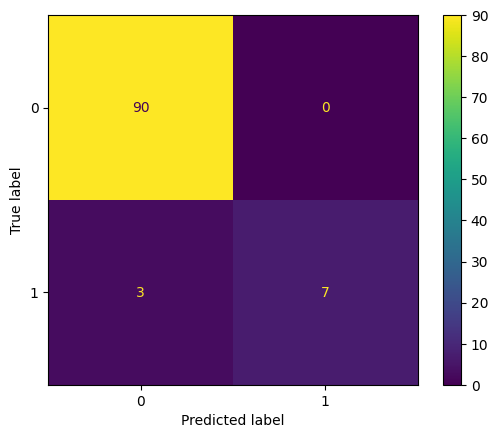

In [83]:
ConfusionMatrixDisplay.from_predictions(y_val_bert, y_pred);

Модель toxic-BERT показала невероятные результаты. Был использован только бэкбон, в качестве классификатора была взята LogisticRegression. При невероятно маленькой обучающей выборке (900 записей) эта связка переплюнула все другие модели. Увеличение обучающей выборки скорее всего приведет к еще бОльшему росту метрики.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Мы не всегда можем позволить себе возможность дообучать модели BERT (у кого-то нет ресурсов, например хорошего датасета), а кому-то просто не хватит для этого навыков.
    
Поэтому в качестве альтернативы всегда стоит рассматривать стратегию получения признаков с помощью моделей, уже обученных для решения задач нужного  типа. 
    
Есть модель `unitary/toxic-bert` (https://huggingface.co/unitary/toxic-bert), можно быстро получить работающее с отличной метрикой решение, если использовать выходы из этой модели. При этом вариантов использовать эту модель есть как минимум 2.
    
 - взять всю модель, включая классифицирующую голову. Но учитывая что выходов из этой "головы" несколько, нужно будет разбираться с тем, как работает модель (какие классы "токсичности" она определяет)
 - использовать бэкбон модели (BERT без классифицирующей головы), с его помощью получить эмбеддинг для каждой фразы и на этих эмбеддингах уже обучить свой классификатор
    
Со вторым подходом можно с минимальными усилиями получить метрику f1 близкую к 0.95.    


<img alt="Meme about Howard Stark that he's limited by the technology of his time" src="./meme.jpg" width="620" height="414">

## 5. <a id='toc5_'></a>Результаты      [&#8593;](#toc0_)

### 5.1. <a id='toc5_1_'></a>Результаты на тренировочной выборке      [&#8593;](#toc0_)

In [84]:
pd.options.display.float_format = '{:.4f}'.format

pd.DataFrame(
    data=[best_score_rfc, 0, best_score_lgbmc, best_score_lr, 0, f1_toxic_bert],
    index=['RandomForestClassifier', 'CatBoostClassifier', 'LGBMClassifier', 'LogisticRegression', 'BERT', 'toxic-BERT'],
    columns=['f1']
).sort_values('f1', ascending=True)

,f1
CatBoostClassifier,0.0000
BERT,0.0000
RandomForestClassifier,0.7645
LGBMClassifier,0.7781
LogisticRegression,0.7860
toxic-BERT,0.8235


### 5.2. <a id='toc5_2_'></a>Результаты на тестовой выборке      [&#8593;](#toc0_)

In [85]:
required_size = 500
train_part = required_size / len(X_test)

In [86]:
X_test_bert, _, y_test_bert, _ = train_test_split(X_test,
                                                  y_test,
                                                  random_state=RANDOM_STATE,
                                                  train_size=train_part,
                                                  stratify=y_test)

In [87]:
X_test_bert.shape, y_test_bert.shape

((500,), (500,))

In [88]:
test_embeddings = get_embeddings(X_test_bert.values.tolist())

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

А сюда можно как-то прогресс бар прикрутить?

</div>

In [89]:
y_pred_bert = toxic_lr.predict(test_embeddings)

In [90]:
f1 = f1_score(y_test_bert, y_pred_bert)
print(f'F1 on test = {f1:.4f}')

F1 on test = 0.8571


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - выбрана лучшая модель
  - тестирование произведено корректно 
  - достигнута метрика f1 выше 0,75 на тестовой выборке
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>

Лучшая модель стала другой.

</div>

In [91]:
print(classification_report(y_test_bert, y_pred_bert))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       449
           1       0.89      0.82      0.86        51

    accuracy                           0.97       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.97      0.97      0.97       500



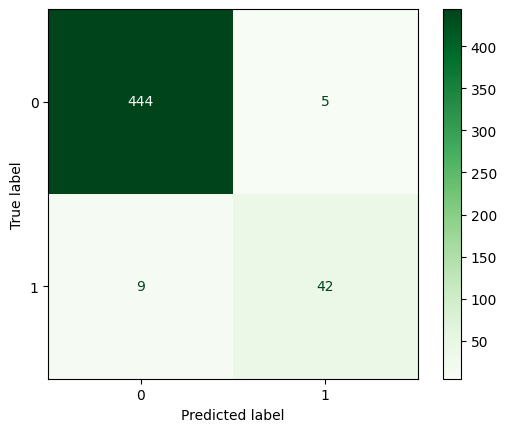

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test_bert, y_pred_bert, cmap='Greens');

## 6. <a id='toc6_'></a>Общий вывод      [&#8593;](#toc0_)

В рамках данного проекта мы работали с задачей обработки естественного языка (NLP), а именно определение токсичности комментариев (бинарная классификация).

Перед нами датасет, состоящий практически практически из `160 000` записей. Он [датасет] не содержит пропусков и полных дубликатов. Также отметим дизбаланс примерно `9:1` в сторону не токсичных комментариев (класс `0`).

Сначала текст был очищен с помощью регулярных выражений, а также лемматизирован.

Были протестированы 4 различные модели с подбором гиперпараметров через *hyperopt*, а именно: *LogisticRegression*, *RandomForestClassifier*, *LGBMClassifier* и *CatBoostClassifier*. Для первых трёх моделей был использован *TfidfVectorizer*, гиперпараметры которого подбирались также через *hyperopt*. А вот *CatBoostClassifier* умеет работать с текстовыми признаками "из коробки", что и было использовано.

Результаты представлены в таблице ниже:

|          Model         |   F1   |
|:----------------------:|:------:|
| CatBoostClassifier     |   0    |
| BERT                   |   0    |
| RandomForestClassifier | 0.7645 |
| LGBMClassifier         | 0.7781 |
| LogisticRegression     | 0.7860 |
| toxic-BERT             | 0.8235 |


Из этих 4 "классических" моделей лучше всего себя показала *LogisticRegression* с результатом `F1 = 0.7860`.

Также была протестирована предобученная (bert-base-uncased) модель *BERT*. На валидационной выборке данная модель показала нулевую F1, так как отнесла все записи к классу `0`. Это ожидаемо, учитывая дизбаланс классов и крайне сильное сокращение обучающей выборки. Необходимо попробовать методы undersampling'а и увеличить обучающую выборку, что требует сильно больше ресурсов (вычислительных и временных). На данный момент модель BERT **НЕ** подходит для проекта.

Последней была протестирована модель *toxic-BERT*. Однако ее дообучение не проводилось. Был использован только бэкбон для получения эмбеддингов, а в качестве классификатора была использована *LogisticRegression*. Данная связка показала прекрасный результат на крайне малом обучающем датасете - `F1 = 0.8235`.

Именно она и была протестирована на тестовой подвыборке и показала результат `F1 = 0.8571`. Это больше минимально необходимой метрики, следовательно проект можно считать успешным. Для теста использовалась крайне малая часть тестовой выборки ввиду больших временных затрат при получении эмбеддингов и смерти ядра в процессе выполнения.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Давай подведем итоги. В целом с проектом ты справляешься - текст предобработан, извлечены признаки и обучены классификаторы. Достигнуто требуемое значение метрики f1.
    
Меня очень порадовало испльзование пайплайнов, hyperopt для подбора гиперпараметров, использовани встроенного векторайзера в Catboost и конечно же корректный код для дообучения BERT.     
    
Но кое с чем нужно еще поработать: Пожалуста доработай  раздел с лемматизацией. Сейчас она выполняется некорректно.



     
Жду твоих исправлений :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> рекомендации по доп. материалам</b>
Если решишь погрузиться в область работы с текстами, очень советую несколько продвинутых бесплатных курсов.
    
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка. Проходить нужно именно в таком порядке,т.к. почти весь современный NLP построен на нейронках.
    
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  
   - Трек NLP от сообщества ODS https://ods.ai/tracks/nlp-course-autumn-22
    
    
А если на тебя произвели впечатление возможности ChatGPT и хочешь попробовать использовать возможности больших языковых моделей для решения своих задач, могу порекомендовать следующие курсы (первые две ссылки на английском, зато последняя подборка лекций на русском).
    
  - https://www.coursera.org/learn/generative-ai-with-llms  (можно прослужать бесплатно)
  - Короткие курсы на сайте https://www.deeplearning.ai/short-courses/  Самый свежак - как писать промпты, как использовать LLM для создания собственных приложений (например как создать бота на основе ChatGPT, который будет отвечать на вопросы по внутренней документации компании).  
  - https://www.promptingguide.ai/introduction/settings
  - https://www.youtube.com/watch?v=l-l82uNwyu8&list=PLy6K3_Hx-udj6n1S88Vslyw2QVxSXLP2c    
    
    
    
    
Также можно обратиться к туториалу по использованию языковых моделей на HugingFace. Обрати внимание, для больше чем половины материалов доступен перевод на русский, хотя можно читать и на языке оригинала. 
    
  https://huggingface.co/learn/nlp-course   
 
</div>